In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
office_data = pd.read_csv('OfficeSupplies Data.csv')

office_data['OrderDate'] = pd.to_datetime(office_data['OrderDate'])

In [10]:
office_data['YearMonth'] = office_data['OrderDate'].dt.to_period('M').dt.to_timestamp()

office_data['Units'] = pd.to_numeric(office_data['Units'], errors='coerce')
office_data['Unit Price'] = pd.to_numeric(office_data['Unit Price'], errors='coerce')

In [11]:
office_data = office_data.dropna(subset=['Units', 'Unit Price'])

# Sales Analysis

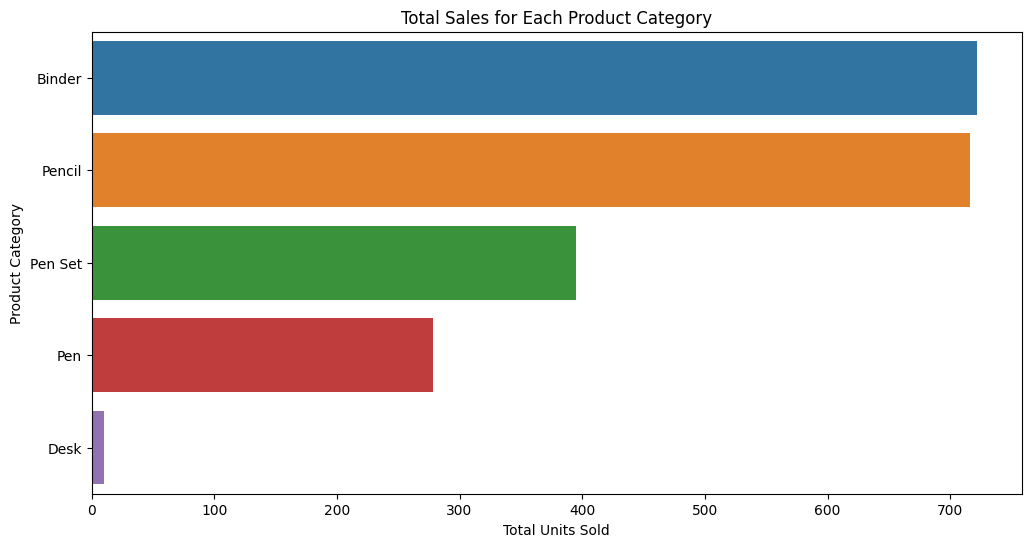

In [3]:
total_sales_category = office_data.groupby('Item')['Units'].sum().reset_index().sort_values(by='Units', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Units', y='Item', data=total_sales_category)
plt.title('Total Sales for Each Product Category')
plt.xlabel('Total Units Sold')
plt.ylabel('Product Category')
plt.show()

In [4]:
top_category = total_sales_category.iloc[0]
print(f"Product category with the highest sales: {top_category['Item']} with {top_category['Units']} units")

Product category with the highest sales: Binder with 722 units


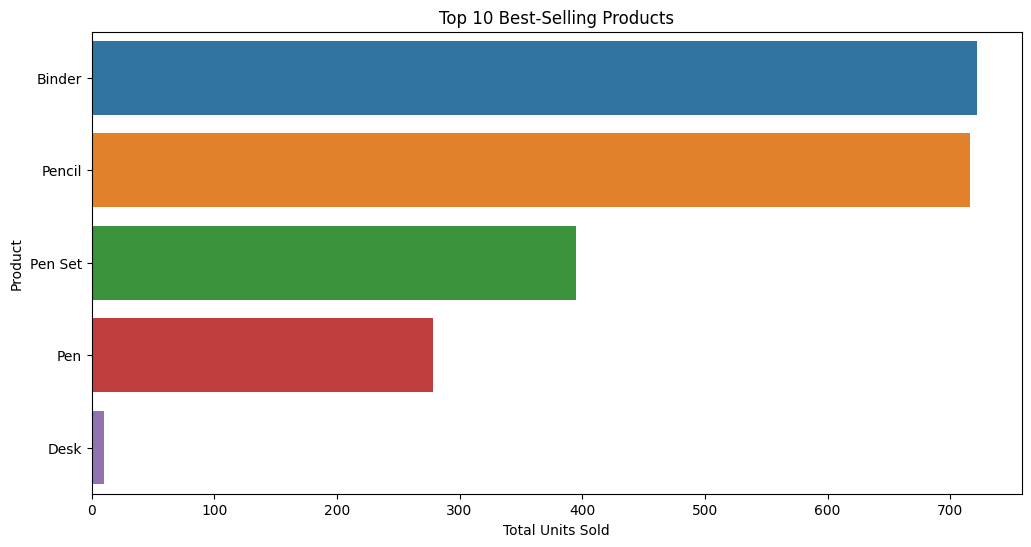

In [5]:
top_10_products = total_sales_category.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Units', y='Item', data=top_10_products)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Units Sold')
plt.ylabel('Product')
plt.show()

# Time Series Analysis

In [12]:
office_data['Total Sales'] = office_data['Units'] * office_data['Unit Price']

monthly_sales = office_data.groupby('YearMonth')['Units'].sum().reset_index()

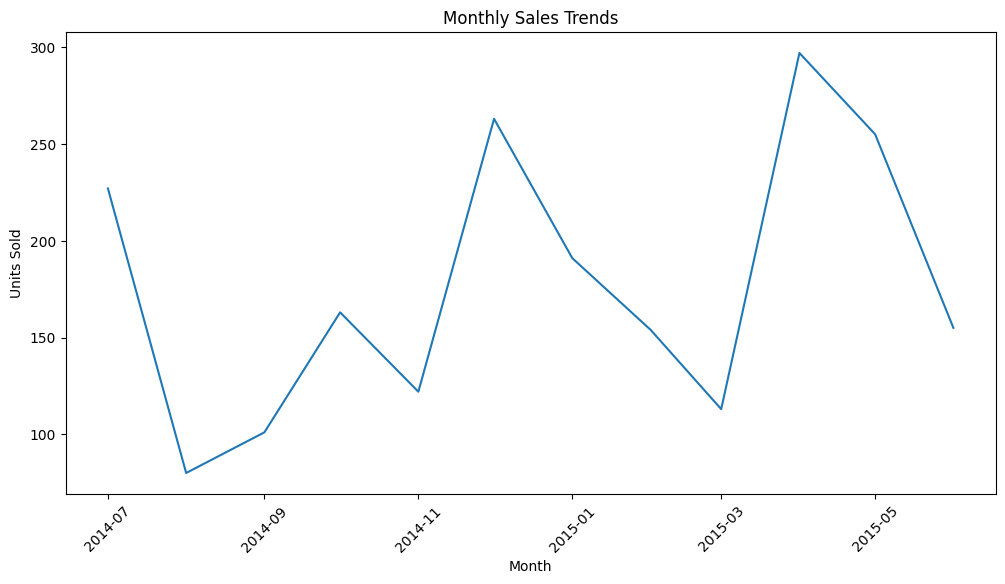

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Units', data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

# Customer Analysis

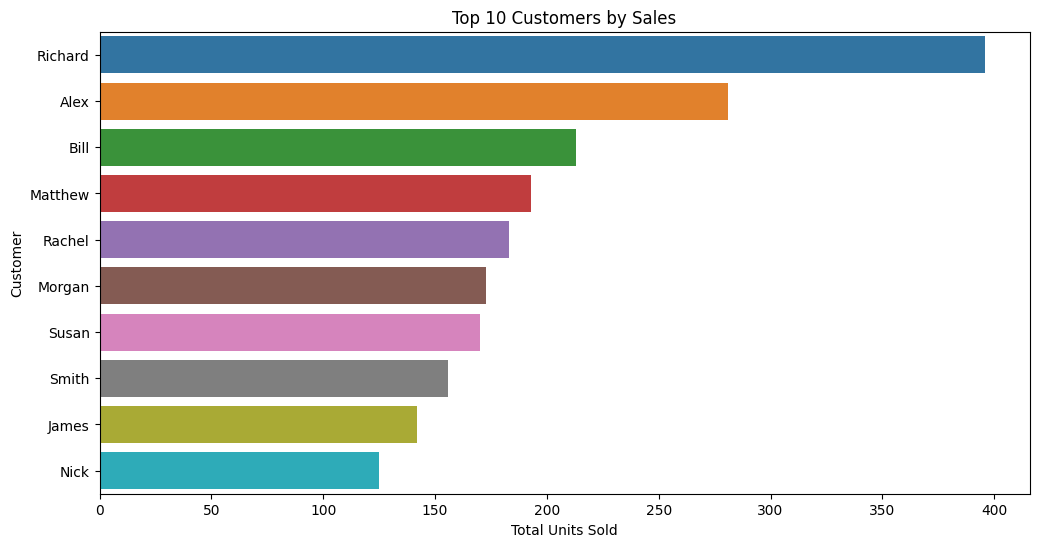

In [6]:
top_10_customers = office_data.groupby('Rep')['Units'].sum().reset_index().sort_values(by='Units', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Units', y='Rep', data=top_10_customers)
plt.title('Top 10 Customers by Sales')
plt.xlabel('Total Units Sold')
plt.ylabel('Customer')
plt.show()

In [7]:
total_unique_customers = office_data['Rep'].nunique()
print(f"Total number of unique customers: {total_unique_customers}")

Total number of unique customers: 11


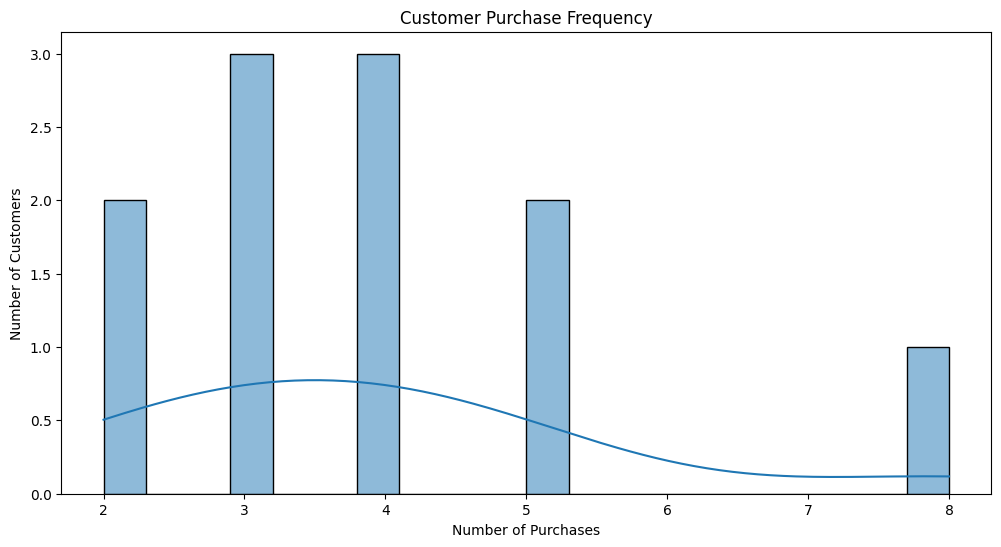

In [8]:
purchase_frequency = office_data['Rep'].value_counts().reset_index()
plt.figure(figsize=(12, 6))
sns.histplot(purchase_frequency['Rep'], bins=20, kde=True)
plt.title('Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()

# Geographical Analysis

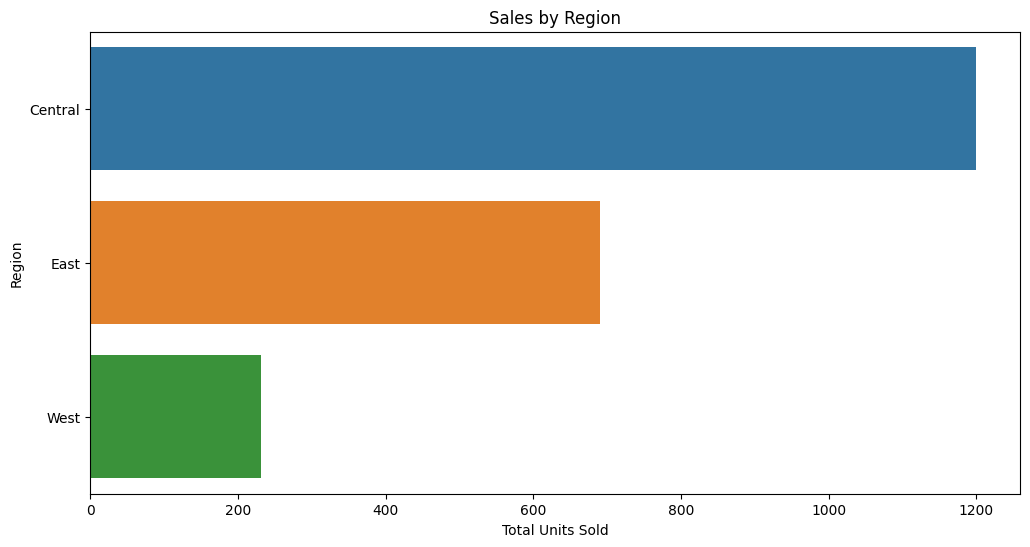

In [15]:
region_sales = office_data.groupby('Region')['Units'].sum().reset_index().sort_values(by='Units', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Units', y='Region', data=region_sales)
plt.title('Sales by Region')
plt.xlabel('Total Units Sold')
plt.ylabel('Region')
plt.show()

# Profit Analysis

In [16]:
office_data['Profit'] = office_data['Units'] * office_data['Unit Price']

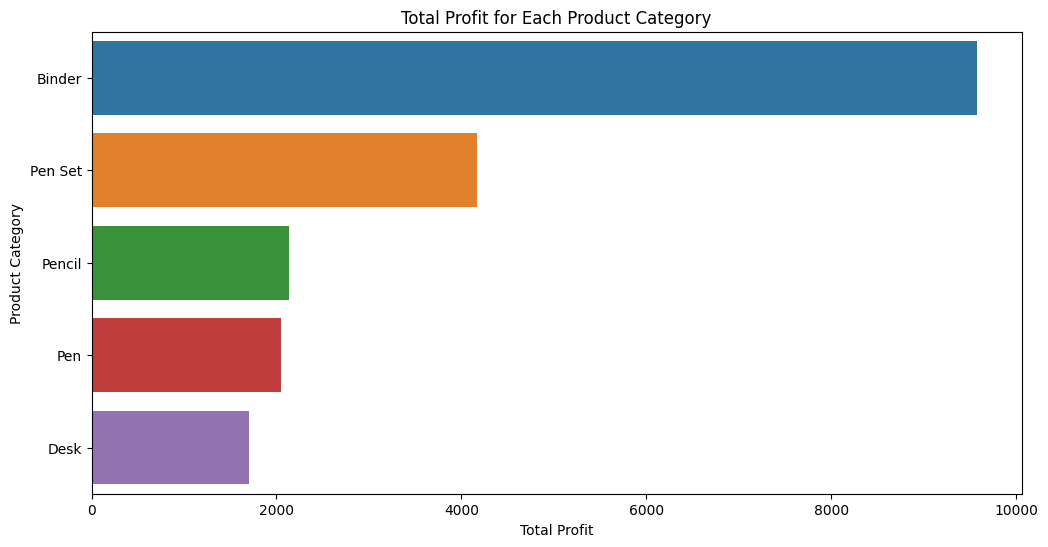

In [17]:
total_profit_category = office_data.groupby('Item')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='Item', data=total_profit_category)
plt.title('Total Profit for Each Product Category')
plt.xlabel('Total Profit')
plt.ylabel('Product Category')
plt.show()

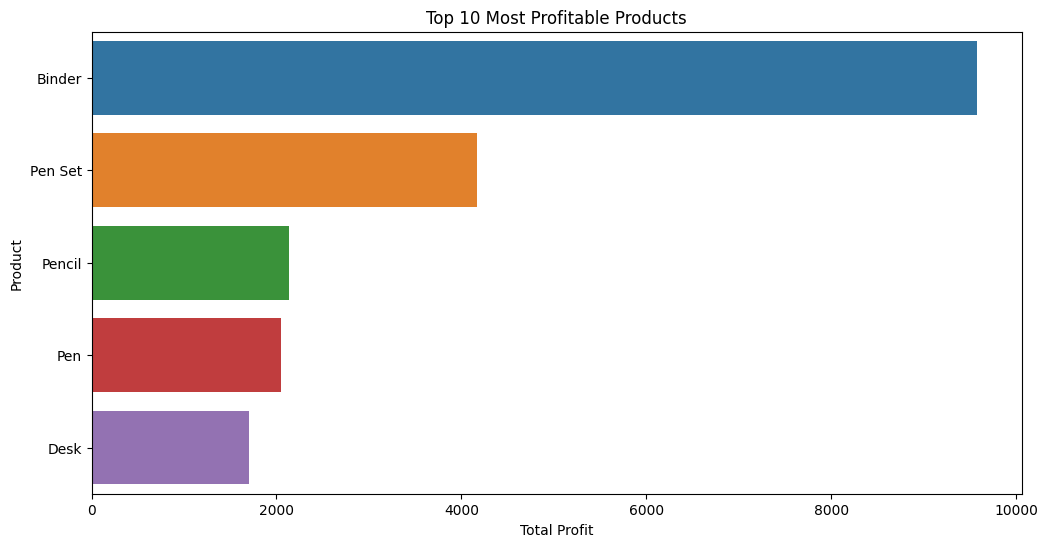

In [18]:
top_10_profitable_products = total_profit_category.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='Profit', y='Item', data=top_10_profitable_products)
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Total Profit')
plt.ylabel('Product')
plt.show()